In [11]:
# Install the pacakges you will need
# You will need imageio if you want to add a spooky moon to your figure :-)

#%pip install seaborn
#%pip install pingouin
#%pip install imageio

In [12]:
# import packages
# you will need pyplot and imread to add a spooky moon to your figure

import pandas as pd                         # to make dataframes
import seaborn as sns                       # to plot basic figures
import pingouin as pg                       # to run statistical analyses
from imageio import imread                  # to add images to figures
from matplotlib import pyplot as plt        # to adjust figures and make them fancy

import warnings                             # to keep Python from putting annoying warnings in your face while you're tyring to work
warnings.filterwarnings('ignore')

## Analysis

In [3]:
# load the data
df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/JASP_data_library/2.%20T-Tests/Moon%20and%20Aggression.csv')

In [4]:
# inspect the data
df.head()

,Moon,Other
0,3.33,0.27
1,3.67,0.59
2,2.67,0.32
3,3.33,0.19
4,3.33,1.26


In [5]:
# get a further overview of the data
df.describe()

,Moon,Other
count,15.000000,15.000000
mean,3.022000,0.589333
std,1.498772,0.444899
min,0.330000,0.110000
25%,2.335000,0.285000
50%,3.330000,0.400000
75%,3.670000,0.670000
max,6.000000,1.590000


In [61]:
# run a paired-samples t-test 

pg.ttest(df['Moon'], df['Other'], paired = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.451789,14,two-sided,0.000015,"[1.62, 3.24]",2.200516,1521.058,1.0


## Results
There were significantly more disruptive behvaior incidents during full moon periods (mean = 3.02) than other lunar periods (mean = 0.58) (t(14)=6.45, p = 0.000015)

<Axes: xlabel='condition', ylabel='disruptive behavior'>

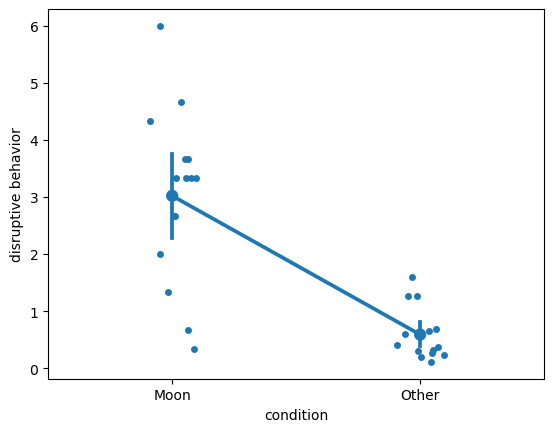

In [62]:
# re-arrange the dataframe to make plotting easier

df_long = df.melt()
df_long.columns = ['condition', 'disruptive behavior']
df_long.head(2)

sns.stripplot(data = df_long, x = 'condition', y = 'disruptive behavior')   # plot the data points
sns.pointplot(data = df_long, x = 'condition', y = 'disruptive behavior')   # plot the means and confidence intervals

## Make your plot prettier

(-0.5, 599.5, 599.5, -0.5)

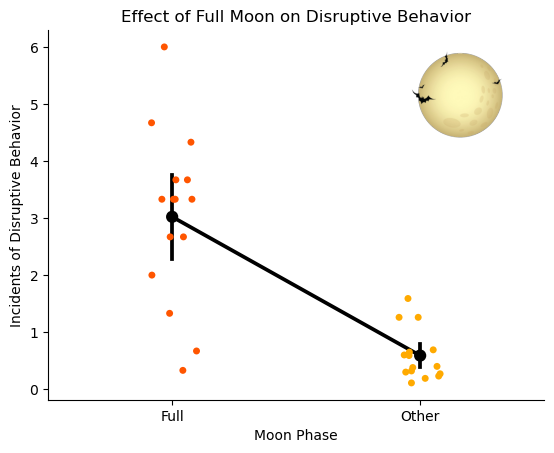

In [60]:
# Create a figure called "ax" to build our figure on
# note: to create this plot, I needed to install and import some packages. See the install and import cells at the top of the notebook
fig, ax = plt.subplots()

# Add a stripplot to show the data points, and a pointplot to shore means and confidence intervals
sns.stripplot(data = df_long, x = 'condition', y = 'disruptive behavior', palette = 'autumn')   # use the "autumn" palette to give the points seasonal colors
sns.pointplot(data = df_long, x = 'condition', y = 'disruptive behavior', color = 'black')      # color the pointplot black

# Add a title, and adjust the axis and tick-mark labels
plt.title('Effect of Full Moon on Disruptive Behavior')
ax.set_ylabel('Incidents of Disruptive Behavior')
ax.set_xlabel('Moon Phase')
ax.set_xticklabels(['Full', 'Other'])

# Remove the top and right side of the frame around the plot
sns.despine()

# Add a spooky moon

# url for the image I want to use
url = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwebstockreview.net%2Fimages%2Fclipart-bat-moon-15.png&f=1&nofb=1&ipt=63d60343ccd98c7518fb491ab9c68fc8f8291dd328670c9f3c4f696d4edf88d9&ipo=images'

# read the image into a variable in Python
spooky_moon = imread(url)

newax = ax.inset_axes([.7, 0.7, 0.25, 0.25])    # create new figure (axes) inside the original figure (the number adjust the location and size of the image)
newax.imshow(spooky_moon)                       # show the moon image inside the new axes
newax.axis('off')                               # hide the axes around the moon